# direct tests on Game Engine
(not going thourght FastAPI server)

In [1]:
import os, glob
import random
from player import Player
from game_engine import Altered_game_engine as altered_ge
from statemachine.contrib.diagram import DotGraphMachine
from IPython.display import Image

In [2]:
altered = altered_ge()
graph = DotGraphMachine(altered)  # also accepts instances
GRAPHVIZ_EXE_PATH = r'Graphviz\graph_viz_12\bin\dot.exe'

def plot_statemachine(graph, verbose=False):
    dot = graph()
    if verbose:
        dot.to_string()
    dot.write_png('test.png', prog=GRAPHVIZ_EXE_PATH)
    return Image(filename='test.png')

In [3]:
n_cards = 10

# remove all json files in the folder games
files = glob.glob('games/*.json')
for f in files:
    os.remove(f)

Player 1 (p1) creates the game, bringing his name and deck in arguments

In [4]:
p1 = Player(name="p1", deck=[f'c{str(i).zfill(2)}' for i in random.sample(range(1, 100), n_cards)], is_AI=True)
p1 = altered.create_a_new_game(p1)
p1

Player(name='p1', deck=['c14', 'c10', 'c76', 'c81', 'c38', 'c12', 'c42', 'c55', 'c98', 'c21'], game_id='7DnkUwbGH7GwNgogDFux2k_20241216T225245', id=1, hand=[], reserve=[], landmarks=[], exp_hero=[], exp_companion=[], mana_pile=[], discard_pile=[], has_passed_afternoon=False, turn_not_ended=False, effects_available=None, pending_effects=None, actions=None, message=None, available_actions=None, server='http://127.0.0.1:8000', is_AI=True, AI_level='random')

p2 joins

In [5]:
p2 = Player(name="p2", deck=[f'c{str(i).zfill(2)}' for i in random.sample(range(1, 100), n_cards)], is_AI=True)
p2.game_id = p1.game_id
p2 = altered.join_a_game(p2)
p2

Player(name='p2', deck=['c15', 'c08', 'c39', 'c16', 'c33', 'c41', 'c78', 'c30', 'c46', 'c83'], game_id='7DnkUwbGH7GwNgogDFux2k_20241216T225245', id=2, hand=[], reserve=[], landmarks=[], exp_hero=[], exp_companion=[], mana_pile=[], discard_pile=[], has_passed_afternoon=False, turn_not_ended=False, effects_available=None, pending_effects=None, actions=None, message=None, available_actions=None, server='http://127.0.0.1:8000', is_AI=True, AI_level='random')

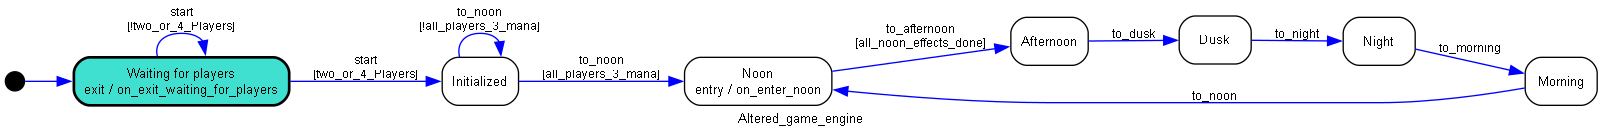

In [6]:
plot_statemachine(graph)

Now that 2 players (or 4) joined we can run the start() transition<br>
If not 2 or 4 players, game state will stay un Waiting for players state

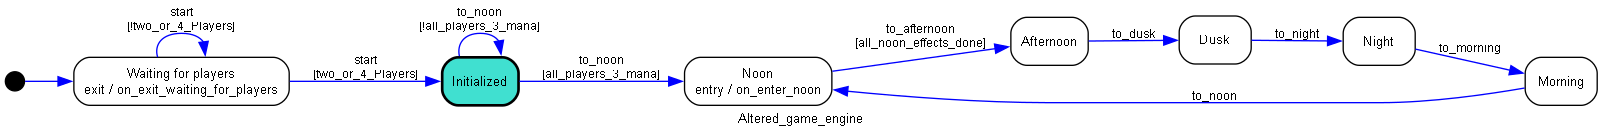

In [7]:
altered.start()
plot_statemachine(graph)

This is where (Initialized state) players are asked to keep 3 cards in hand and put 3 into mana<br>
If you try to go to morning state (with to_morning() transition), game engine will stay in Initialized state :

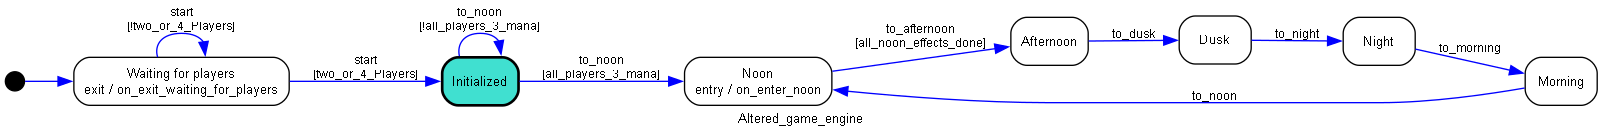

In [8]:
altered.to_noon()
plot_statemachine(graph)

Game engine gives p1 and p2 their 6 cards starting hand when leaving 'Waiting for players' state

In [9]:
p1 = altered.get_player(p1)
print(f'p1 hand: {p1.hand} and mana pile: {p1.mana_pile} --> {p1.message}')
p2 = altered.get_player(p2)
print(f'p2 hand: {p2.hand} and mana pile: {p2.mana_pile} --> {p2.message}')

p1 hand: ['c98', 'c12', 'c38', 'c14', 'c55', 'c81'] and mana pile: [] --> Discard 3 cards to mana and/or wait for other players to do so
p2 hand: ['c83', 'c15', 'c39', 'c16', 'c46', 'c30'] and mana pile: [] --> Discard 3 cards to mana and/or wait for other players to do so


p1 and p2 discard 3 cards into mana

In [10]:
p1.actions = p1.AI_discard_3_to_mana()
p1 = altered.play_actions(p1)
print(f'p1 hand: {p1.hand} and mana pile: {p1.mana_pile} --> {p1.message}')

p2.actions = p2.AI_discard_3_to_mana()
p2 = altered.play_actions(p2)
print(f'p2 hand: {p2.hand} and mana pile: {p2.mana_pile} --> {p2.message}')

p1 hand: ['c38', 'c55', 'c81'] and mana pile: ['c12', 'c14', 'c98'] --> Discard 3 cards to mana and/or wait for other players to do so
p2 hand: ['c83', 'c39', 'c16'] and mana pile: ['c15', 'c30', 'c46'] --> Discard 3 cards to mana and/or wait for other players to do so


Now we can move to Morning phase

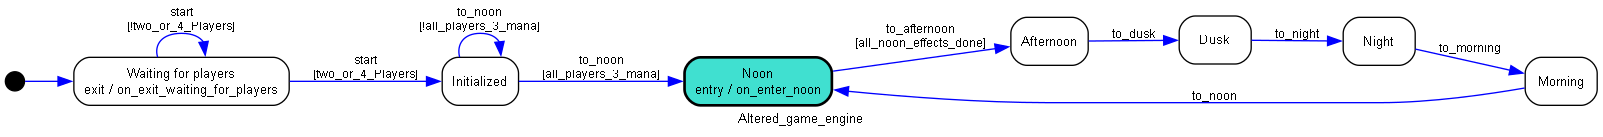

In [11]:
altered.to_noon()
plot_statemachine(graph)